In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Google Drive path where project material is available
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Dissertation'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['accepted_2007_to_2018q4.csv.zip', 'accepted_2013_to_2018_filtered.csv', 'accepted_2013_to_2018_latest.csv', 'accepted_2013_to_2018_latest1.csv', 'sample_model.ipynb', 'Cleaned_data.csv', 'Final_balanced_data.csv', 'ANN_2.ipynb', 'Data_cleaning.ipynb', 'FINAL_unbalancedData.csv', 'FINAL_balancedData.csv', 'FINAL_forModeling.csv', 'y_data.csv', 'x_data.csv', 'XGBoost_model.ipynb', 'Model4_XGBoost_GPU.ipynb', 'NN_Keras.ipynb', 'Cleaned_data_dummy.csv', '3_Filter Individual_loans_EDA_ and_cleaning.ipynb', 'Copy of Individual_loans_hypothesisTesting.ipynb', 'Decsion_tree_model.joblib', 'Model_1_Logistic_regression.ipynb', 'Random_fores.joblib', 'XGBoost_model.joblib', 'ANN_model.joblib', 'Model_3_Random_Forest.ipynb', 'XAI_RandomForest.ipynb', '4_Individual_loans_hypothesisTesting_and_undersampling.ipynb', 'FINAL_balancedData_testing.csv', 'Model_5_ANN.ipynb', 'Random_forest_model.ipynb', 'Untitled0.ipynb', '1_Filter_data_2013_to_2018.ipynb', '2_Filter_data_on_Loan_status.ipynb', 'Copy of

In [ ]:
#Import important libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  f1_score,roc_auc_score, precision_score, recall_score,
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
import joblib

In [ ]:
#Load dependent and independent variables
X = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'x_data.csv'))
y = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'y_data.csv'))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#Split the data into train and test in 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y, random_state = 7)

In [ ]:
x_train.head() #display train independent variables

,int_rate,sub_grade,term_years,inq_last_6mths,grade,mths_since_last_delinq,num_tl_op_past_12m,Not Verified,acc_open_past_24mths,MORTGAGE,fico_score,num_rev_tl_bal_gt_0,emp_length_years,Source Verified,mths_since_last_record,num_actv_rev_tl,pub_rec,Verified,mths_since_recent_inq,mort_acc
408969,15.31,14,5,1.0,2,78.0,3.0,0,6.0,1,722.0,5.0,6.0,0,67.0,5.0,1.0,1,3.0,1.0
168054,9.17,6,3,0.0,1,3.0,2.0,0,5.0,0,692.0,3.0,10.0,0,999.0,3.0,0.0,1,7.0,4.0
231269,15.59,14,5,3.0,2,12.0,1.0,0,1.0,1,667.0,6.0,1.0,1,999.0,6.0,0.0,0,0.0,2.0
127804,16.99,15,5,0.0,3,17.0,0.0,0,0.0,1,662.0,7.0,10.0,1,999.0,7.0,0.0,0,15.0,2.0
872069,17.27,16,3,0.0,3,999.0,5.0,1,7.0,1,667.0,5.0,7.0,0,999.0,5.0,0.0,0,7.0,2.0


In [ ]:
y_train.head() #display train dependent variable where 1 is for default and 0 is for fully paid

,loan_status
408969,1
168054,0
231269,0
127804,1
872069,0


In [ ]:
#Convert data into arrays, XGboost accept data in arrays
x_train1 = x_train.values
x_test1 = x_test.values
y_train1 = y_train.values
y_test1 = y_test.values

In [ ]:
#Define default weights for managing class imbalance
loan_distribution = y_train.value_counts(normalize=True)
# default weught wrt to fully paid loan weight
default_weight = loan_distribution[0] / loan_distribution[1]
print(f"default_weight: {default_weight}") #print default weight

default_weight: 1.9734412677700015


In [ ]:
# define Grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'max_depth': [10, 12, 15],
    'n_estimators': [50, 100, 200]
}

In [ ]:
xg_model = XGBClassifier(random_state=42, scale_pos_weight=1.94) #define model

In [ ]:
grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid,
                           cv=5, verbose=2, n_jobs=-1)

In [ ]:
grid_search.fit(x_train1, y_train1)#perform Grid search

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'max_depth': [10, 12, 15],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
best_model_xg = grid_search.best_estimator_ # save the best model which used best hyperparameter

In [ ]:
grid_search.best_estimator_ #display hyperparameter for best model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = best_model_xg.predict(x_test1) #perform predictions

In [ ]:
print("Classification Report:")
print(classification_report(y_test1, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82    146697
           1       0.65      0.60      0.62     74335

    accuracy                           0.76    221032
   macro avg       0.73      0.72      0.72    221032
weighted avg       0.75      0.76      0.75    221032



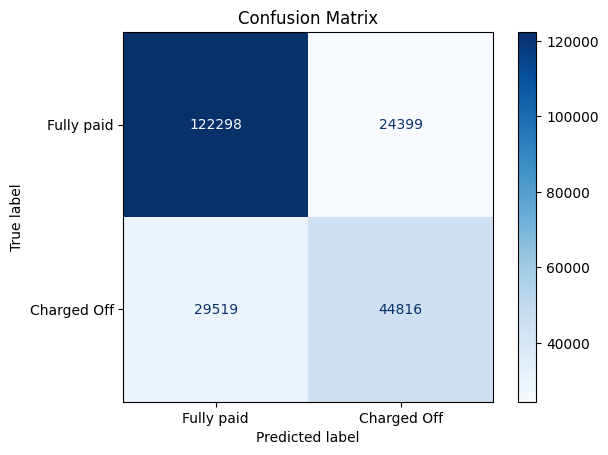

In [ ]:
cm_xg= confusion_matrix(y_test1, y_pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm_xg, display_labels=['Fully paid', 'Charged Off'])
display_cm.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Make predictions
y_train_pred_xg = best_model.predict(x_train1)
y_test_pred_xg = best_model.predict(x_test1)
y_test_pred_proba_xg = best_model.predict_proba(x_test1)[:, 1]

# # performance metrices
train_accuracy = accuracy_score(y_train1, y_train_pred_xg)
test_accuracy = accuracy_score(y_test1, y_test_pred_xg)
precision = precision_score(y_test1, y_test_pred_xg)
recall = recall_score(y_test1, y_test_pred_xg)
f1 = f1_score(y_test1, y_test_pred_xg)
auc = roc_auc_score(y_test1, y_test_pred_proba_xg)

# Print performance results
print(f"Train Accuracy of xgBoost: {train_accuracy*100}")
print(f"Test Accuracy of xgBoost: {test_accuracy*100}")
print(f"Precision of xgBoost: {precision*100}")
print(f"Recall of xgBoost: {recall *100}")
print(f"F1 Score of xgBoost: {f1*100}")
print(f"AUC of xgBoost: {auc *100}")

Train Accuracy of xgBoost: 89.68642478560747
Test Accuracy of xgBoost: 75.60624705924934
Precision of xgBoost: 64.74897059885862
Recall of xgBoost: 60.289231183157334
F1 Score of xgBoost: 62.43956809474051
AUC of xgBoost: 80.19137230611135


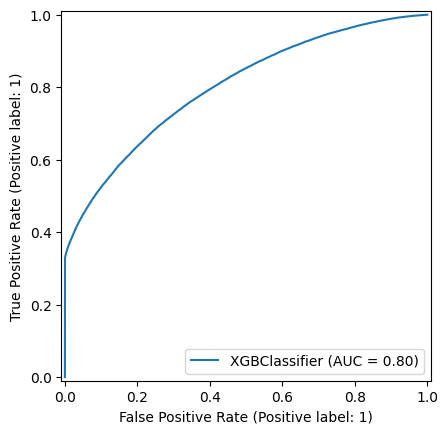

In [ ]:
#displau ROC curve
RocCurveDisplay.from_estimator(best_model, x_test1, y_test1)

In [ ]:
#-----------------------------------------------------Save the best model and test it by loading --------------------------------------------------

In [1]:
#Save the model
joblib.dump(best_model_xg, 'drive/My Drive/Dissertation/XGBoost_model.joblib')

In [ ]:
loaded_model = joblib.load('drive/My Drive/Dissertation/XGBoost_model.joblib')

In [ ]:
y_train_pred_testing= loaded_model.predict(x_test1)

In [ ]:
accuracy_score(y_test1, y_train_pred_testing)

0.7560624705924934

In [ ]:
#------------------------------------------------------------------END----------------------------------------------------------------------------------------------